# **Project Title: Cleaning a Messy Data Set**

## **Project Members:**
- Meher Venkat Karri
- Vedant Patel
- Venkata Sainath Rameswarapu

# **Introduction**

This project focuses on exploring and preparing a dataset of over 12,795 wines, each with chemical composition attributes and a target variable indicating the number of wine cases sold. The key objective is to identify and resolve any data integrity and usability issues through **exploratory data analysis (EDA) and data preparation techniques.** The dataset includes several attributes such as acidity levels, alcohol content, and subjective measures like label appeal. These attributes will be analyzed to uncover trends, distributions, and potential problems like missing values or skewed data, which could hinder the performance of machine learning models. After identifying these issues, appropriate data cleaning and transformation methods will be applied to improve the quality and usability of the dataset for future modeling.

The steps involved in this process include:

- Loading and inspecting the dataset to assess its initial state.
- Performing EDA to uncover patterns and integrity issues.
- Cleaning the dataset by handling missing data, transforming skewed distributions, and addressing outliers.
- Re-evaluating the dataset post-cleaning to ensure its readiness for machine learning tasks.

# **Importing libraries**

In [1]:
# importing all the necessary libraries required -meher
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import missingno as mno
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

from scipy import stats

# **Fetching Dataset**

In [2]:
# loading dataset  - Meher
df=pd.read_csv('https://raw.githubusercontent.com/Vedant278/DAV-6150/refs/heads/main/M3_Data.csv',
               usecols = ['INDEX','TARGET',	'FixedAcidity',	'VolatileAcidity',	'CitricAcid',	'ResidualSugar',	'Chlorides',	'FreeSulfurDioxide',
                           'TotalSulfurDioxide',	'Density',  'pH',	'Sulphates',	'Alcohol',	'LabelAppeal',	'AcidIndex',	'STARS'])
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [3]:
#  -Meher
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [4]:
#  -Meher
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [5]:
# checking null values - Sainath
null_val = df.isnull().sum()
null_percent = (df.isnull().sum()/len(df))*100
min_val = df.min(numeric_only=True)
max_val = df.max(numeric_only=True)
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
unique_val = df.nunique()
null_df = pd.DataFrame({'null_val': null_val, 'null_percent': null_percent,'min': min_val,'max': max_val,
                        'mean': mean,'median': median,'mode': mode, 'unique_values': unique_val})
null_df

,null_val,null_percent,min,max,mean,median,mode,unique_values
INDEX,0,0.000000,1.00000,16129.00000,8069.980305,8110.00000,1.0000,12795
TARGET,0,0.000000,0.00000,8.00000,3.029074,3.00000,4.0000,9
FixedAcidity,0,0.000000,0.00000,34.40000,8.063251,7.00000,6.8000,313
VolatileAcidity,0,0.000000,0.00000,3.68000,0.641086,0.41000,0.2400,510
CitricAcid,0,0.000000,0.00000,3.86000,0.686315,0.44000,0.3000,347
ResidualSugar,616,4.814381,0.00000,141.15000,23.367809,12.90000,1.4000,1342
Chlorides,638,4.986323,0.00000,1.35100,0.222559,0.09800,0.0360,996
FreeSulfurDioxide,647,5.056663,0.00000,623.00000,106.679042,56.00000,29.0000,617
TotalSulfurDioxide,682,5.330207,0.00000,1057.00000,204.319120,154.00000,140.0000,858
Density,0,0.000000,0.88809,1.09924,0.994203,0.99449,0.9976,5933


In [6]:
# Checking duplicate values  -Meher
df.duplicated().sum()

0

In [7]:
# droping the Index col as its of no use  -Meher
df.drop('INDEX',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


<Axes: >

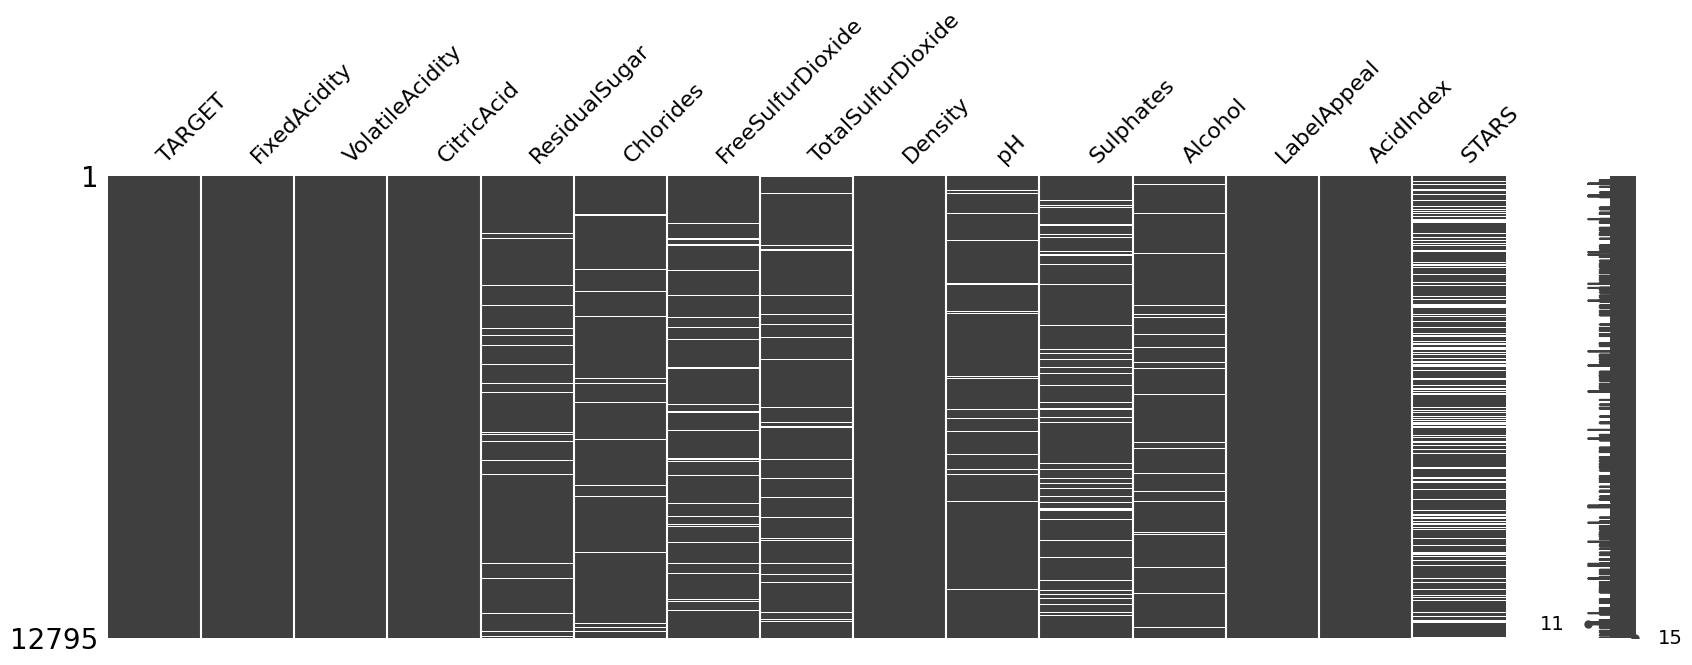

In [8]:
# Graphical representation of null Values -Meher
mno.matrix(df, figsize = (20, 6))

The plot indicates the presence of missing values in multiple columns of the dataset. Columns like Sulphates and STARS show a significant number of missing entries, while other columns such as FixedAcidity and LabelAppeal have no missing data.

In [9]:
#  -Meher
df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


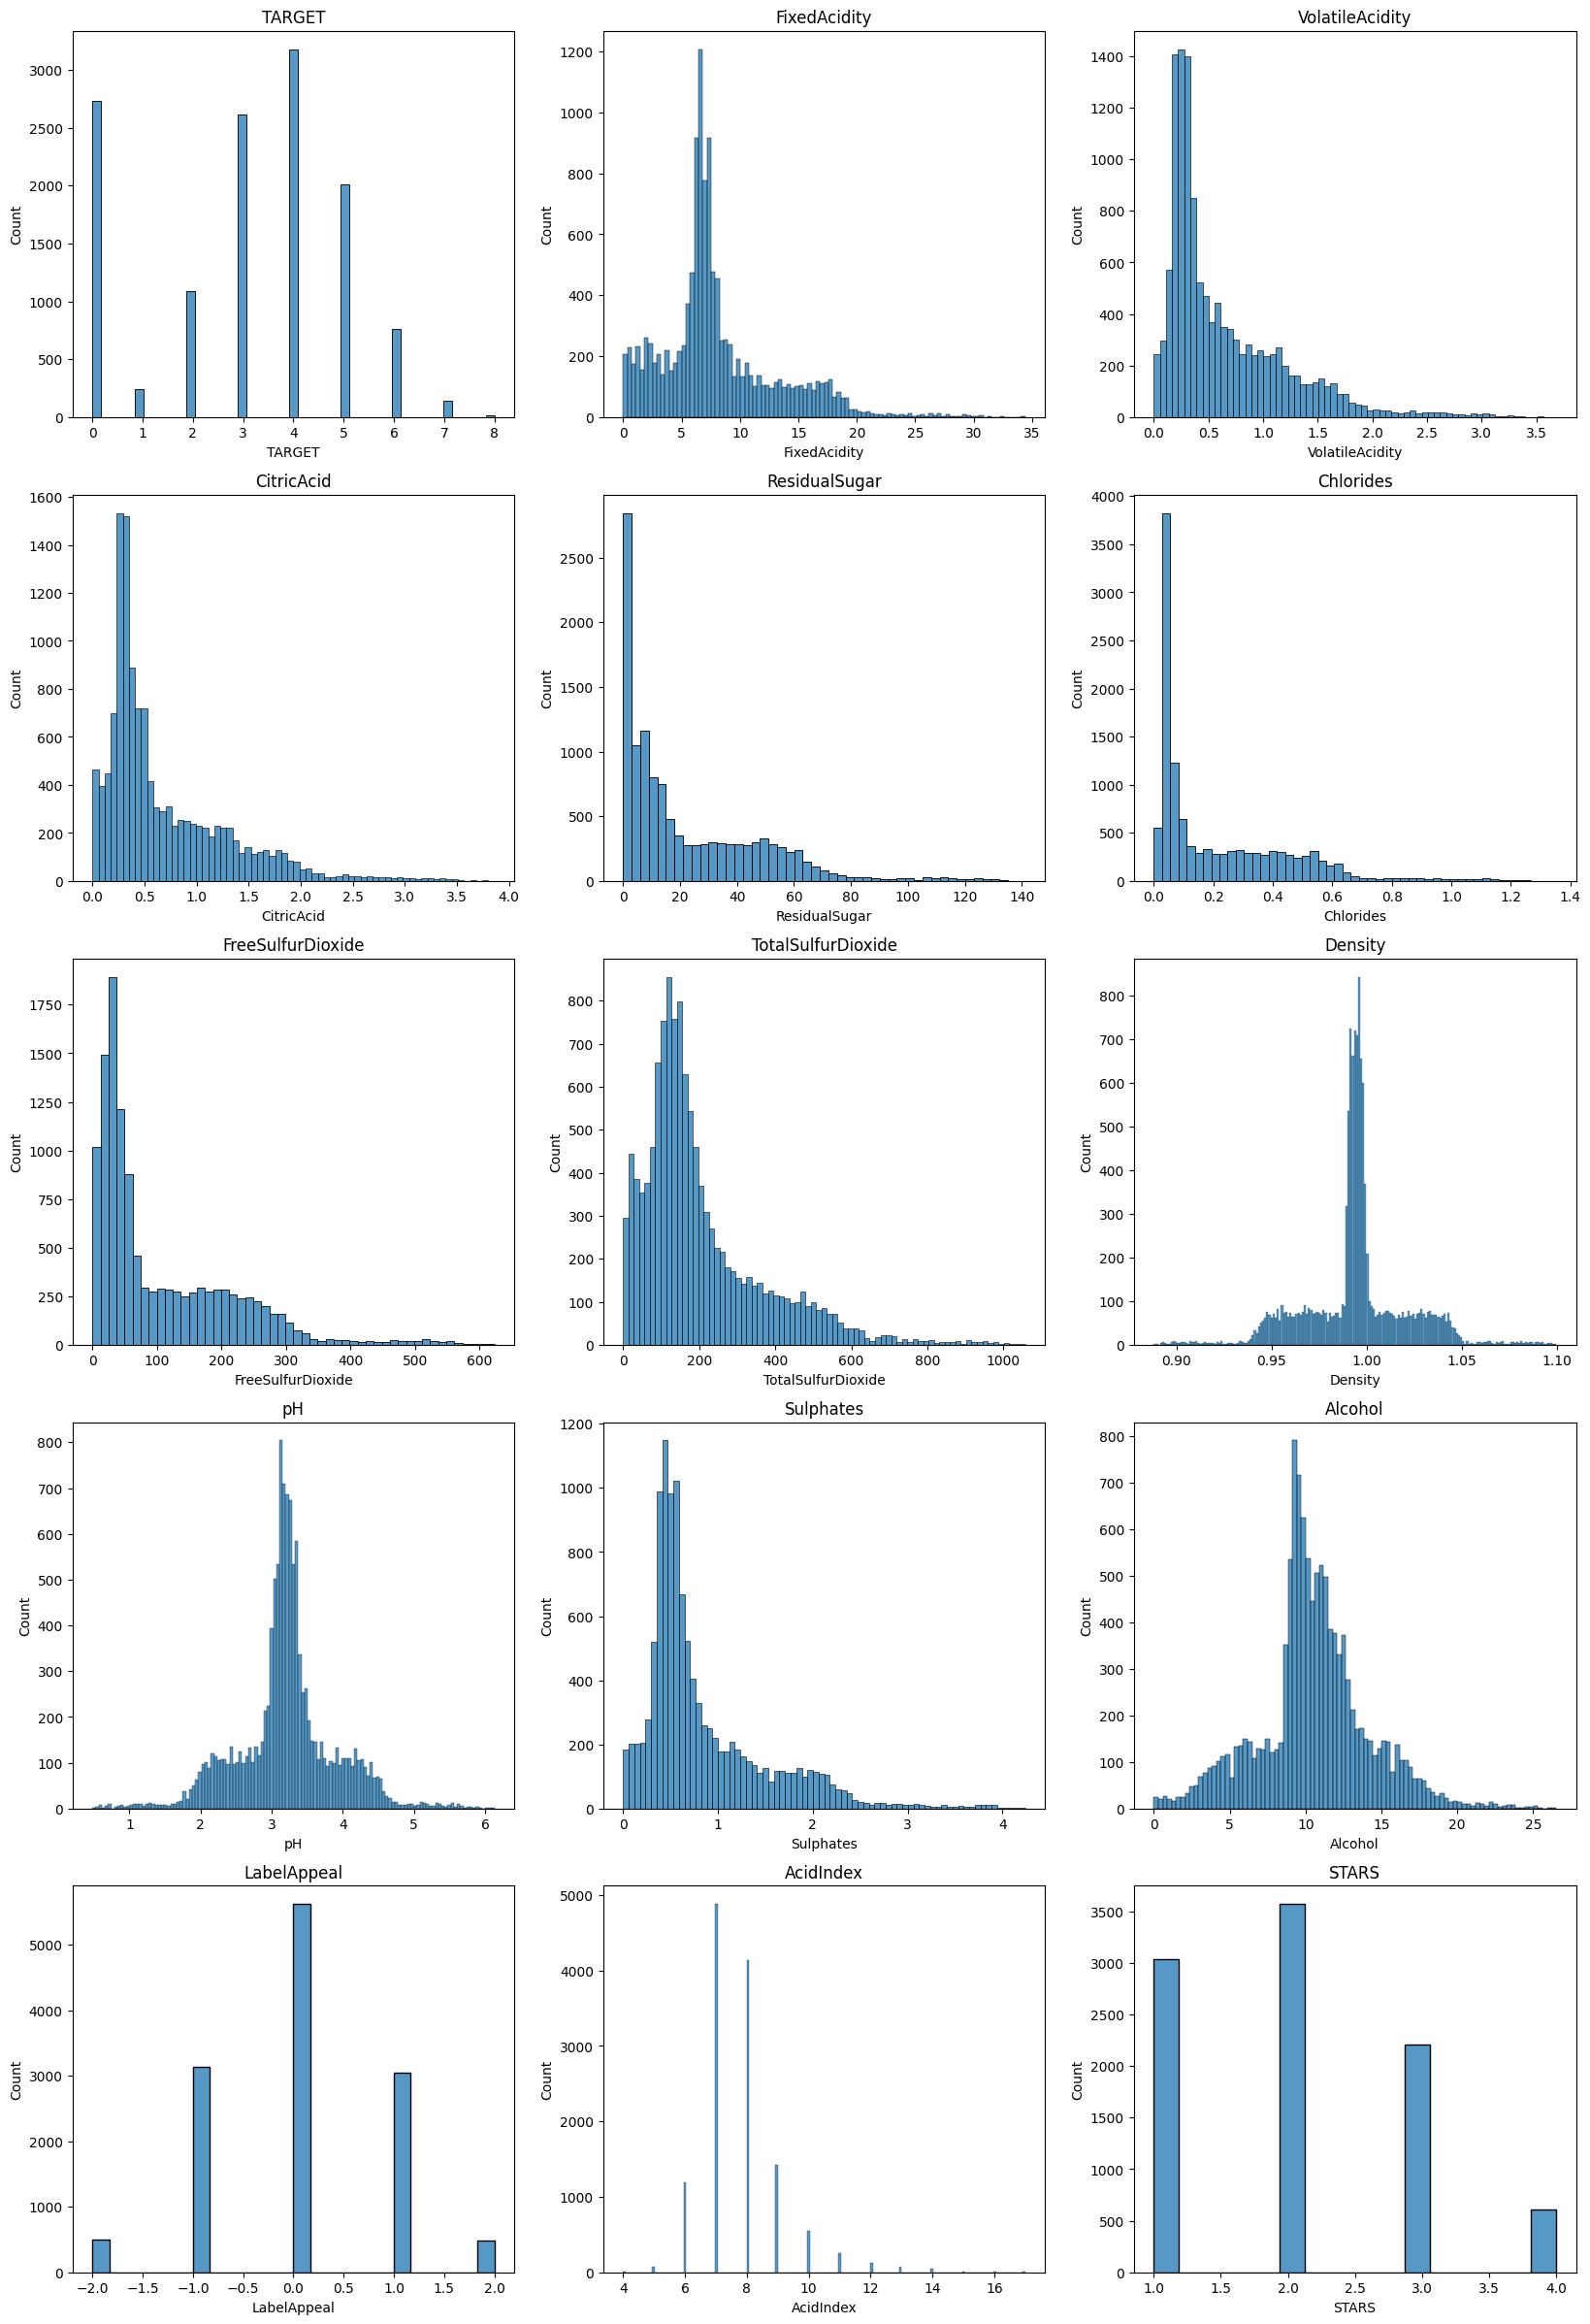

In [10]:
# Using histplot for each attribute - Vedant
plt.figure(figsize=(20,30))
for i,j in itertools.zip_longest(df.columns,range(len(df.columns))):
  plt.subplot(5,3,j+1)
  sns.histplot(df[i])
  plt.title(i)

- Most variables like FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, and Sulphates exhibit right-skewed distributions, with most values concentrated at the lower end.
- pH and Alcohol show a more normal-like distribution, while Density has a sharp peak around 1.0, indicating that most values are very similar.
- LabelAppeal has a clear central tendency at 0, while AcidIndex is heavily concentrated around values 6-8.
- The STARS feature predominantly has ratings between 1 and 3, with few entries rated as 4, and TARGET shows more variability but peaks around 4.

In [11]:
# Creating a correlation matrix to identify the direct or inverse relationships between attributes - Vedant
corr_matrix = df.corr()
corr_matrix

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
TARGET,1.000000,-0.052984,-0.070195,0.013953,0.003645,-0.028463,0.024503,0.035253,-0.035518,-0.009445,-0.035259,0.063394,0.356500,-0.246049,0.558794
FixedAcidity,-0.052984,1.000000,0.010195,-0.004378,0.005040,0.002232,-0.003158,-0.012379,-0.000057,-0.002324,0.020987,-0.009406,-0.002240,0.179916,-0.018505
VolatileAcidity,-0.070195,0.010195,1.000000,-0.002511,0.003443,0.008041,-0.010797,-0.035379,-0.004208,0.016246,0.007220,0.014157,-0.015353,0.035434,-0.030154
CitricAcid,0.013953,-0.004378,-0.002511,1.000000,-0.013510,-0.004550,0.003845,0.009138,-0.010854,0.003293,0.017488,-0.006218,0.017322,0.036506,0.001627
ResidualSugar,0.003645,0.005040,0.003443,-0.013510,1.000000,-0.002837,-0.007418,0.014476,-0.002794,0.001203,-0.007658,-0.006927,-0.000567,-0.011646,0.009897
Chlorides,-0.028463,0.002232,0.008041,-0.004550,-0.002837,1.000000,-0.004884,-0.015316,0.016483,0.008080,0.021366,-0.001174,-0.008534,0.029846,0.002516
FreeSulfurDioxide,0.024503,-0.003158,-0.010797,0.003845,-0.007418,-0.004884,1.000000,0.014710,0.005979,-0.006287,-0.002096,-0.011384,0.011858,-0.021074,0.002465
TotalSulfurDioxide,0.035253,-0.012379,-0.035379,0.009138,0.014476,-0.015316,0.014710,1.000000,0.014692,0.010575,-0.010995,-0.033102,-0.015027,-0.037786,-0.001291
Density,-0.035518,-0.000057,-0.004208,-0.010854,-0.002794,0.016483,0.005979,0.014692,1.000000,0.005768,0.012044,-0.007828,-0.009370,0.040413,-0.018284
pH,-0.009445,-0.002324,0.016246,0.003293,0.001203,0.008080,-0.006287,0.010575,0.005768,1.000000,0.013386,-0.009365,0.004138,-0.058676,-0.000488


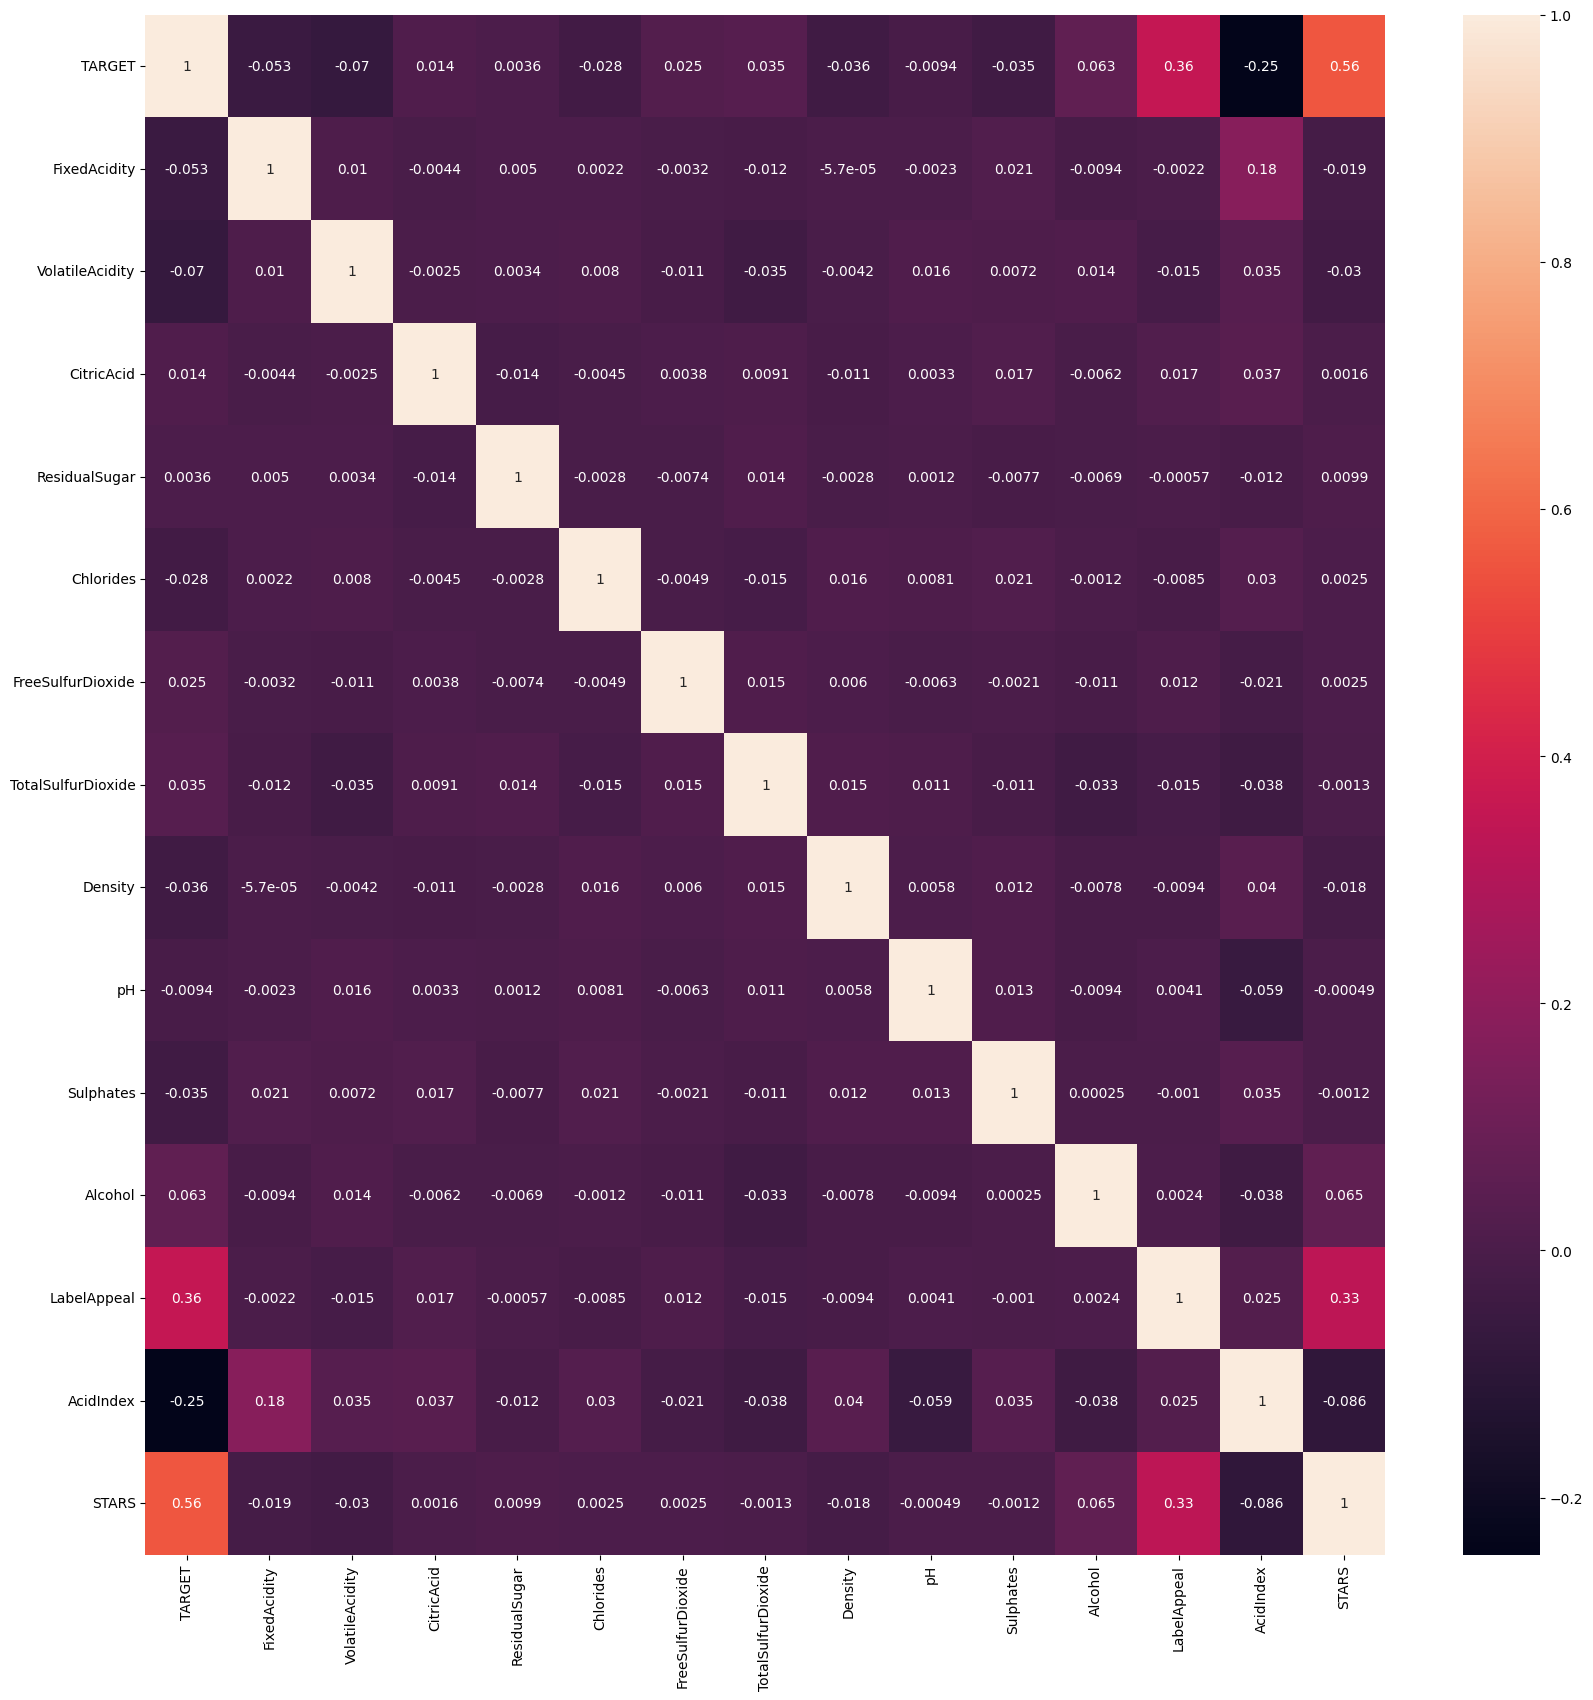

In [12]:
# Visualizing the above corr matrix using heatmap - Vedant
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

- The TARGET variable has a strong positive correlation with STARS (0.56) and a moderate negative correlation with LabelAppeal (-0.36) and AcidIndex (-0.25), indicating that these features may be significant predictors for TARGET.
- Most of the other variables show weak correlations with each other, suggesting minimal multicollinearity among them.
- The highest positive correlation observed, aside from TARGET with STARS, is between LabelAppeal and AcidIndex (0.33), but even this is moderate.
- The overall pattern indicates that many of the variables are relatively independent.

In [13]:
# differentiating Numerical and Categorical Columns - Vedant
num_cols = ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol']

cat_cols = ['LabelAppeal', 'AcidIndex', 'STARS','TARGET']

num_missing_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide','pH', 'Sulphates', 'Alcohol']

cat_missing_cols = ['STARS']

#**EDA**

###**Univariate**

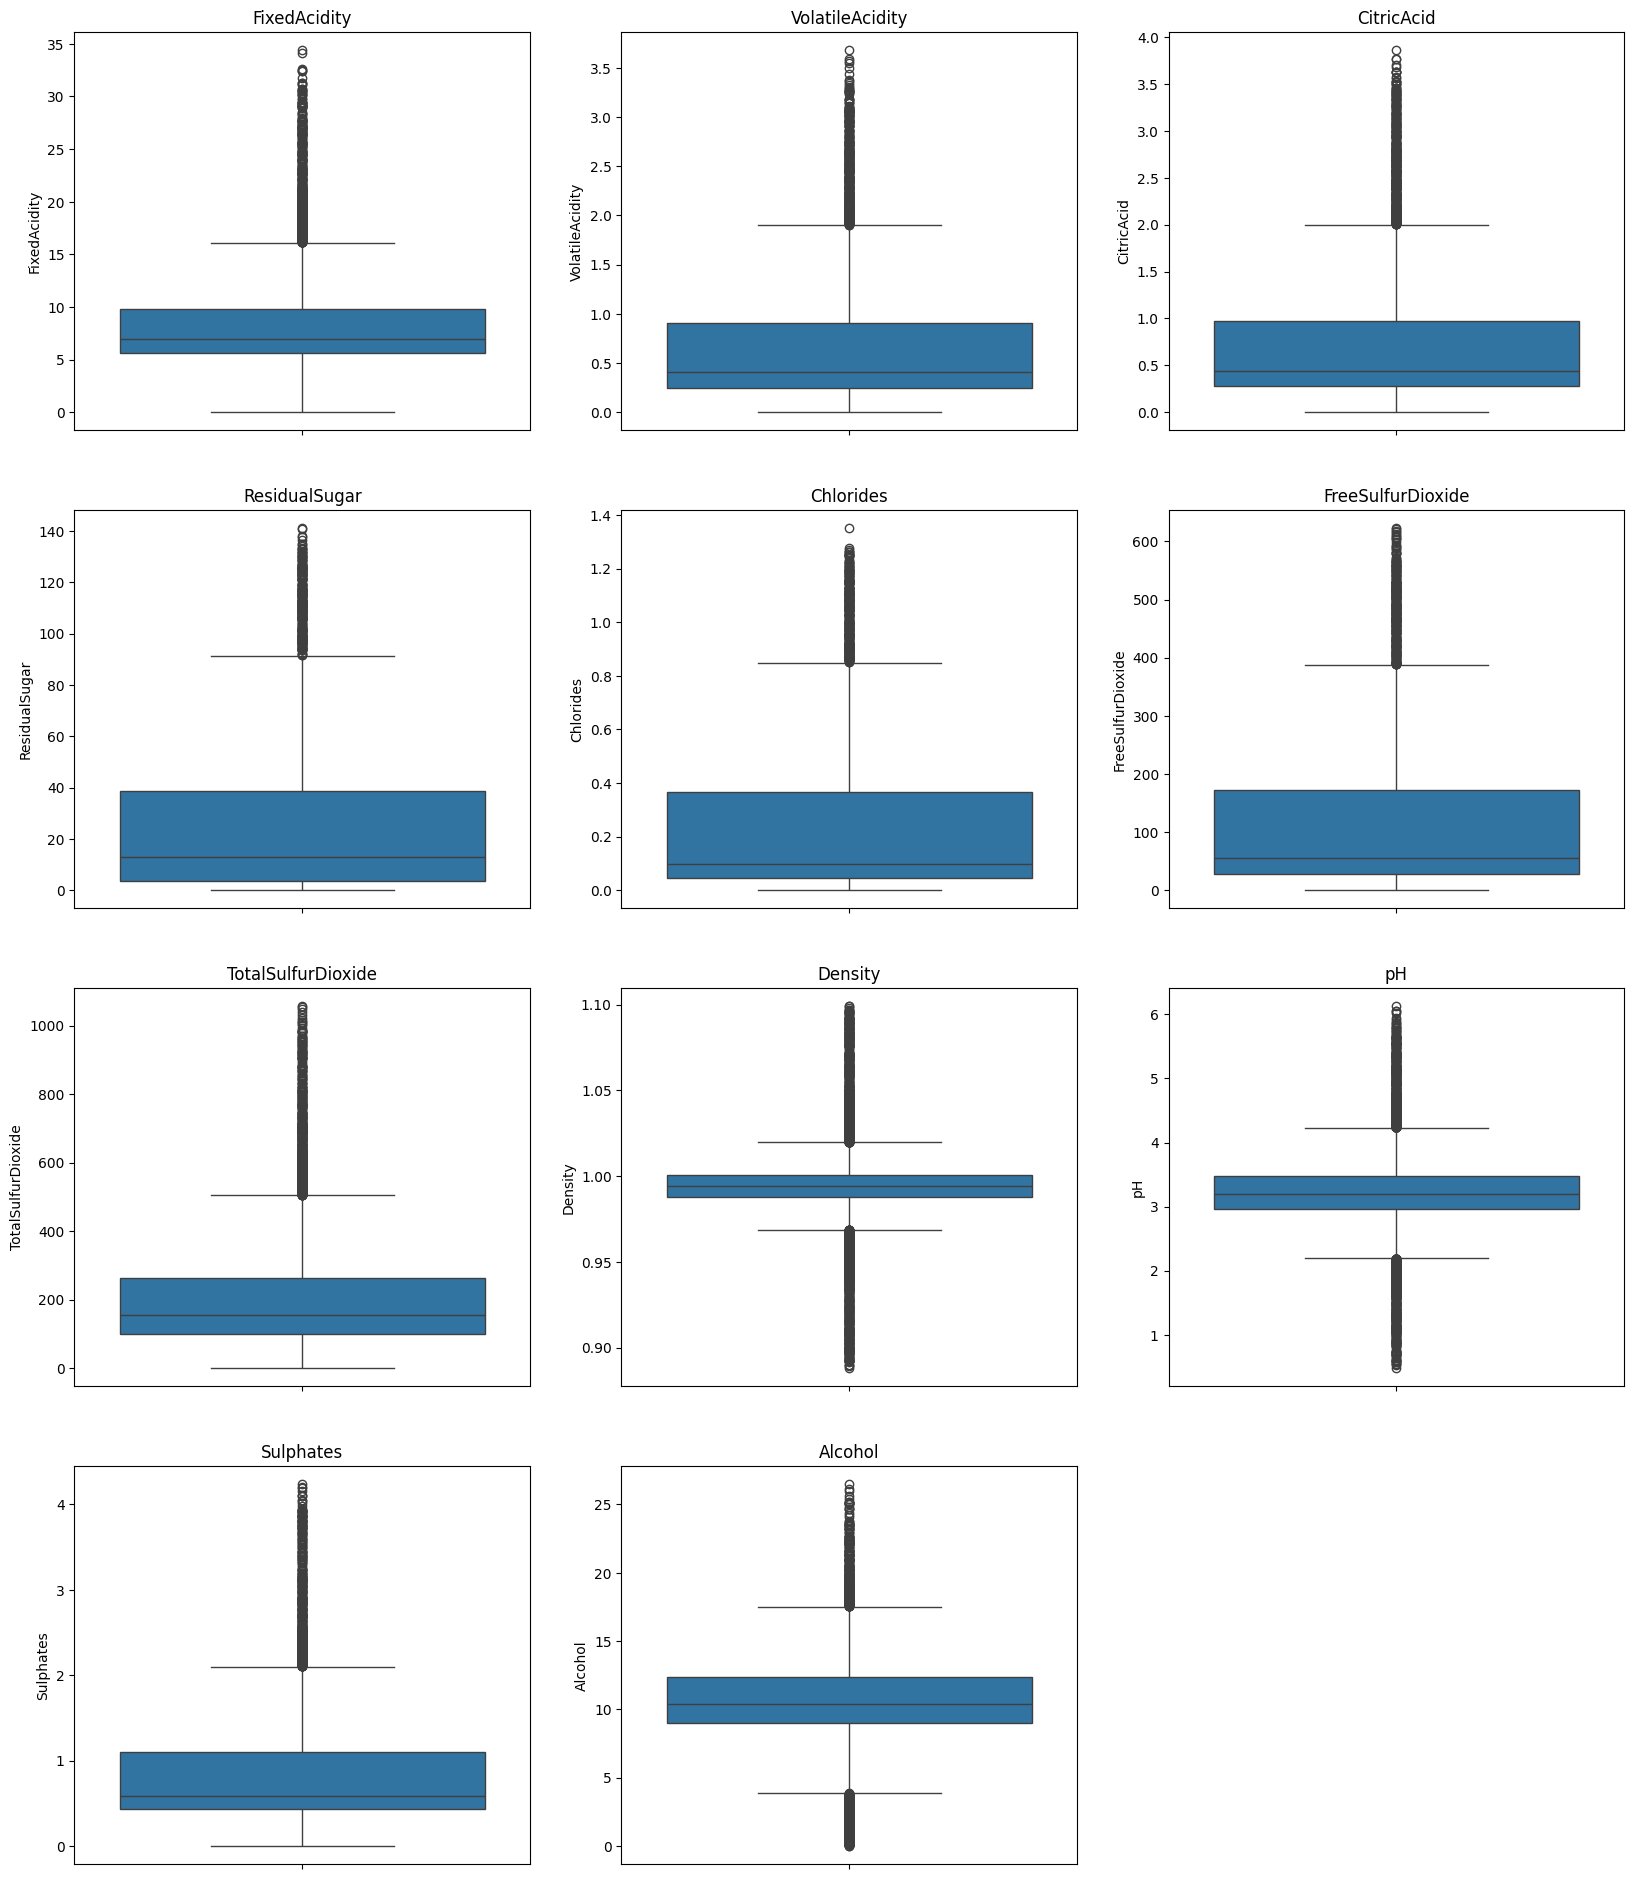

In [14]:
# Analysing Numerical Columns using Boxplot - Meher
plt.figure(figsize=(20,30))
for i,j in itertools.zip_longest(num_cols,range(len(num_cols))):
  plt.subplot(5,3,j+1)
  sns.boxplot(df[i])
  plt.title(i)

The boxplots indicate that most of the variables have a substantial number of outliers, with features like FixedAcidity, VolatileAcidity, ResidualSugar, Chlorides, and TotalSulfurDioxide displaying significant variability beyond their upper whiskers. The distribution for each variable is relatively concentrated around the median, suggesting that while the central values are consistent, extreme values are frequent in this dataset. Additionally, variables like Alcohol and FreeSulfurDioxide have a wider spread, showing that their values vary more compared to others.

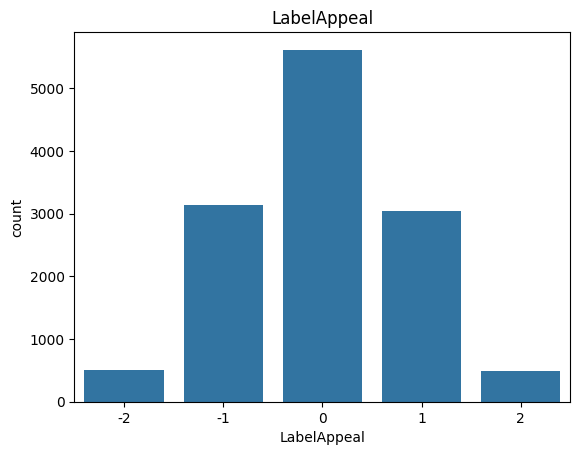

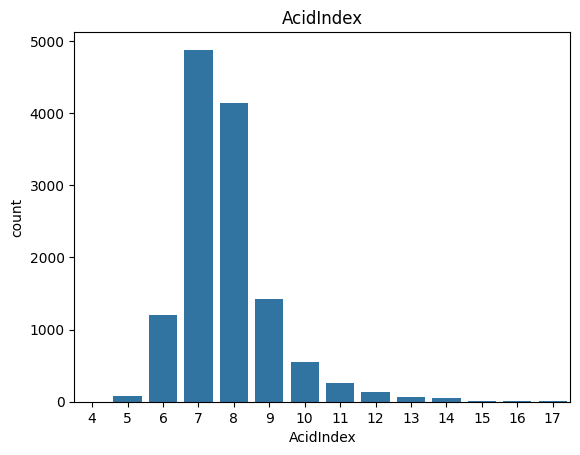

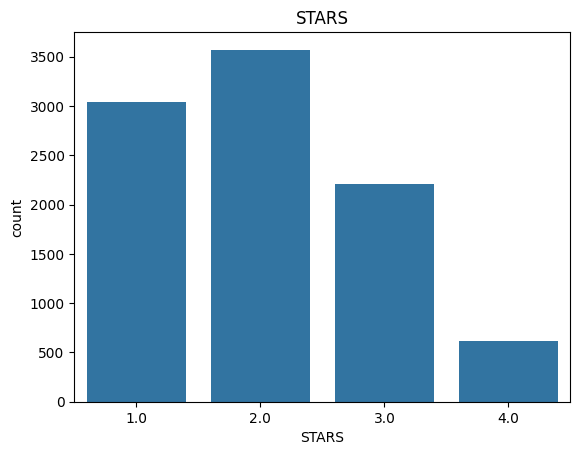

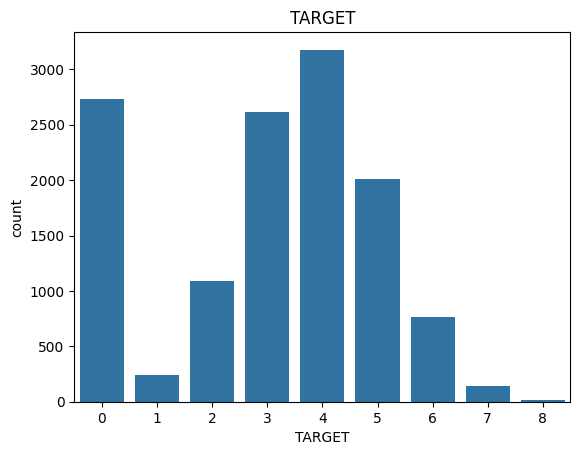

In [15]:
# Analying categorical columns using Countplot - Meher
for col in cat_cols:
  sns.countplot(x=df[col], data=df)
  plt.title(col)
  plt.show()

- **LabelAppeal**: The distribution is centered around 0, with most values being 0 or close to it, indicating that neutral label appeal is most common, while extreme values (-2 and 2) are rare.

- **AcidIndex**: The distribution is heavily skewed towards lower values, with most observations between 6 and 8, suggesting that lower acid levels are more prevalent in the dataset.

- **STARS**: The STARS ratings decrease in frequency as the rating increases, with 2 being the most common rating, followed by 1, 3, and very few observations with a rating of 4.

- **TARGET**: The TARGET variable shows a relatively broad distribution, with the highest concentration around 4 and fewer observations in the extreme ends (0 and 7+).

###**Bivariate**

####**Alcohol Vs Sulphates**

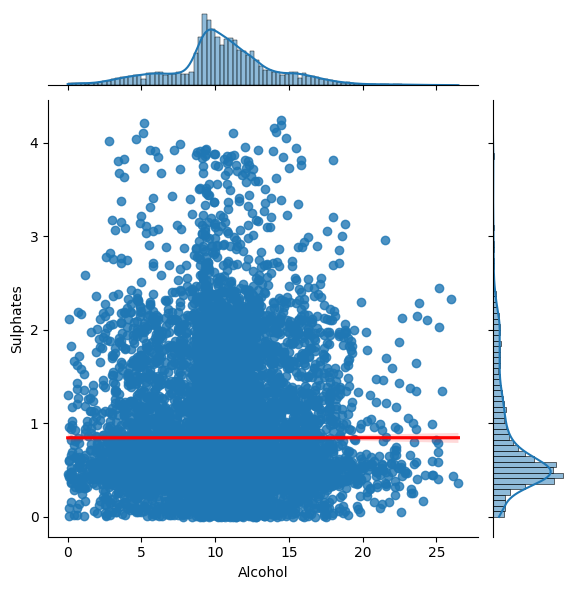

In [16]:
# -Vedant
sns.jointplot(x='Alcohol',y='Sulphates',data=df,kind='reg',line_kws={"color": "red"})
plt.show()

The scatter plot with marginal histograms shows the relationship between Alcohol and Sulphates.

- The central red line indicates the overall trend, which appears to be almost flat, suggesting a very weak or no correlation between Alcohol and Sulphates.
- The distribution of Alcohol is right-skewed, with most data points concentrated between 10 to 15, while Sulphates values have a peak around 0.5 to 1.
- The data points are widely dispersed, indicating variability, but no clear linear relationship exists between Alcohol and Sulphates.

####**ResidualSugar vs. Density**

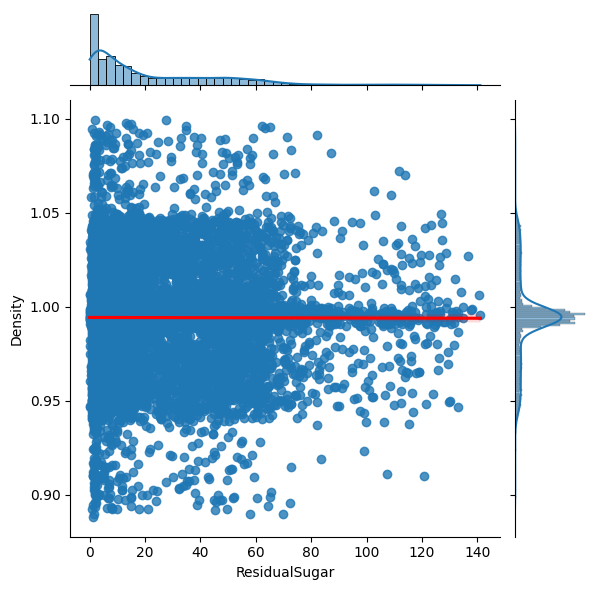

In [17]:
# -Vedant
sns.jointplot(x='ResidualSugar',y='Density',data=df,kind='reg',line_kws={"color": "red"})
plt.show()

The scatter plot with marginal histograms shows the relationship between ResidualSugar and Density.

- The red line suggests that there is almost no correlation between ResidualSugar and Density, as the trend remains flat across the range.
- ResidualSugar is right-skewed, with most values concentrated between 0 and 20, while Density is tightly centered around 1.0.
- The dispersion of data points is wide, particularly for higher values of ResidualSugar, but this variability does not translate into a meaningful relationship with Density.

####**FixedAcidity vs. CitricAcid**

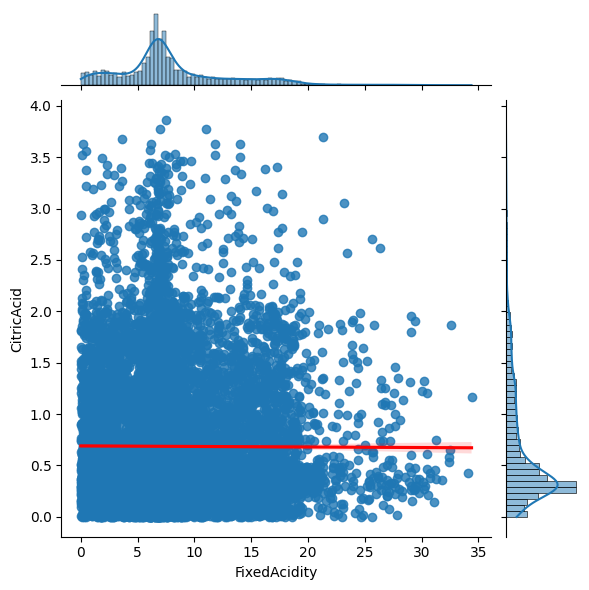

In [18]:
# -Vedant
sns.jointplot(x='FixedAcidity',y='CitricAcid',data=df,kind='reg', line_kws={"color":"red"})
plt.show()

The scatter plot with marginal histograms illustrates the relationship between FixedAcidity and CitricAcid.

- The red trend line is almost flat, indicating little to no correlation between FixedAcidity and CitricAcid.
- The distribution of FixedAcidity is right-skewed, with most values concentrated between 5 and 10, while CitricAcid peaks around 0.5 and decreases gradually as values increase.
- The spread of data points suggests that while there's variability in both variables, they do not show a meaningful or consistent linear relationship with each other.

####**pH vs VolatileAcidity**

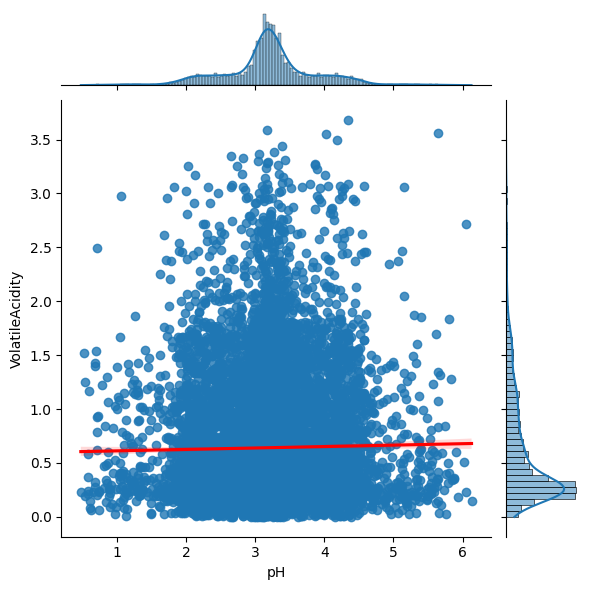

In [19]:
# -Vedant
sns.jointplot(x='pH',y='VolatileAcidity',data=df,kind='reg', line_kws={"color":"red"})
plt.show()

- The red trend line is nearly flat, indicating a very weak or no correlation between pH and VolatileAcidity.
- The scatter plot with marginal histograms shows the relationship between pH and VolatileAcidity.
- The pH values have a slightly skewed distribution with most data points clustered between 3 and 4, while VolatileAcidity is more widely dispersed but peaks around 0.5 to 1.
- Despite the spread of data points, no clear linear relationship is observed between pH and VolatileAcidity, suggesting they are largely independent of each other in this dataset.

####**FreeSulfurDioxide Vs'TotalSulfurDioxide**

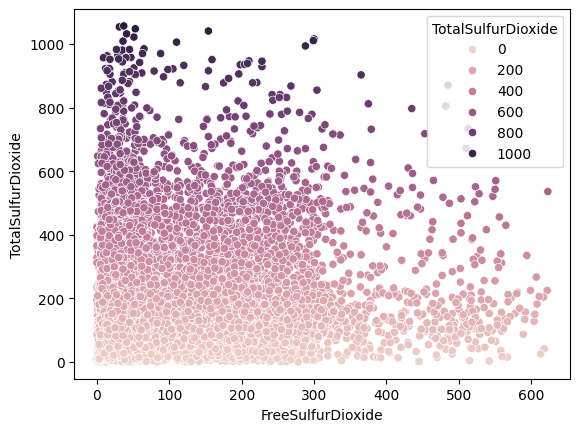

In [20]:
# -Vedant
sns.scatterplot(x='FreeSulfurDioxide',y='TotalSulfurDioxide',data=df,hue='TotalSulfurDioxide')
plt.show()

The scatter plot depicts the relationship between FreeSulfurDioxide and TotalSulfurDioxide with point sizes representing the values of TotalSulfurDioxide.

- There is a clear positive correlation between FreeSulfurDioxide and TotalSulfurDioxide, indicating that as FreeSulfurDioxide increases, TotalSulfurDioxide also tends to increase.
- The density of points is highest at the lower end of both variables, suggesting that smaller values are more common in the dataset.
- The gradual spread in the upper range shows variability, but the overall upward trend confirms a strong linear relationship between these two variables.

####**LabelAppeal Vs Alcohol**

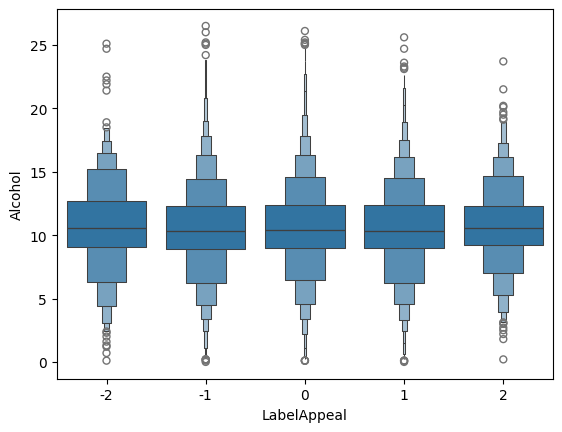

In [21]:
# -Vedant
sns.boxenplot(x='LabelAppeal',y='Alcohol',data=df)
plt.show()

The box plot shows the distribution of Alcohol content across different LabelAppeal categories.

- The median Alcohol level appears consistent across all LabelAppeal categories, hovering around the same central value, indicating no significant variation in alcohol content with changes in label appeal.
- Each LabelAppeal category displays a similar spread of values with some outliers present, suggesting that the variation in Alcohol content is independent of label appeal ratings.
- Overall, the plot suggests that LabelAppeal does not have a noticeable effect on the Alcohol content in this dataset.

####**AcidIndex Vs FixedAcidity**

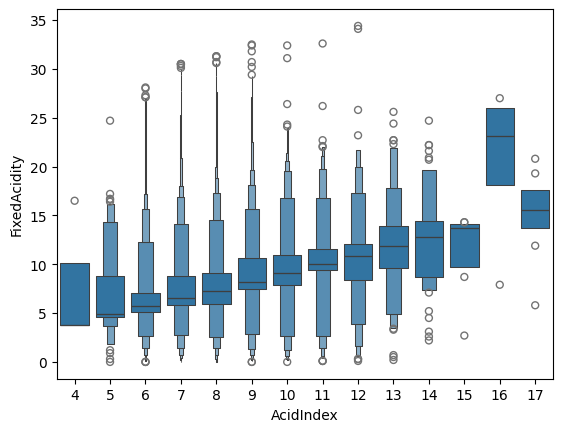

In [22]:
# -Vedant
sns.boxenplot(x='AcidIndex',y='FixedAcidity',data=df)
plt.show()

The box plot shows the distribution of FixedAcidity across different AcidIndex values.

- As AcidIndex increases, there is a noticeable rise in the median values of FixedAcidity, especially for higher AcidIndex values (15-17), indicating a positive association between these two variables.
- The spread of FixedAcidity remains relatively wide for most AcidIndex categories, with multiple outliers present, particularly in the lower AcidIndex ranges (4-9).
- Overall, higher AcidIndex values tend to correspond with increased FixedAcidity, suggesting that these two variables may be linked, with more variability observed at lower AcidIndex levels.

####**TARGET vs ResidualSugar**

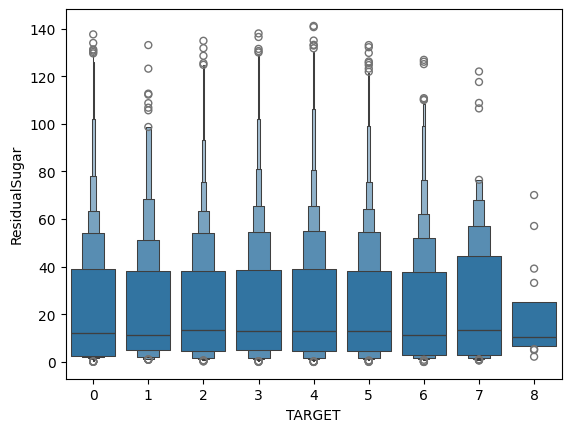

In [23]:
# -Vedant
sns.boxenplot(x='TARGET',y='ResidualSugar',data=df)
plt.show()

The box plot displays the distribution of ResidualSugar across different TARGET values.

- The median ResidualSugar remains relatively consistent across most TARGET categories, suggesting no strong relationship between TARGET and ResidualSugar.
- There is significant variability and many outliers across all TARGET values, especially for higher ResidualSugar levels, indicating that some data points have extremely high sugar content regardless of the TARGET value.
- As TARGET increases beyond 6, the range of ResidualSugar decreases slightly, but overall, ResidualSugar does not show a clear trend with respect to changes in TARGET.

####**STARS vs Sulphates**

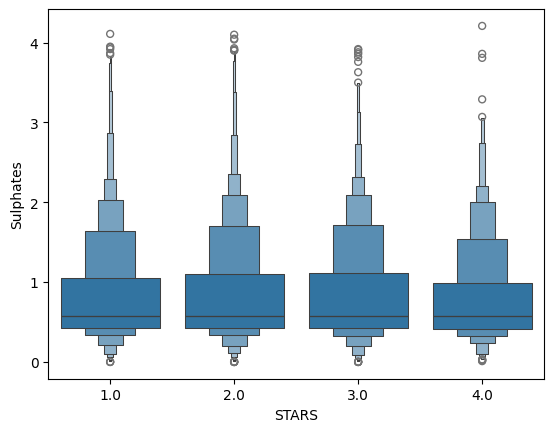

In [24]:
# -Vedant
sns.boxenplot(x='STARS',y='Sulphates',data=df)
plt.show()

The box plot shows the distribution of Sulphates across different STARS ratings.

- The median Sulphates levels are quite consistent across all STARS categories, indicating little variation in Sulphates content as STARS ratings change.
- The spread of Sulphates is similar across all categories, with a relatively wide range and several outliers present in each STARS group, suggesting that Sulphates content does not vary significantly with the STARS rating.
- Overall, the STARS rating does not appear to be strongly influenced by the Sulphates level, as the distribution remains uniform across different ratings.

###**Multivariate**

####**Num_Cols**

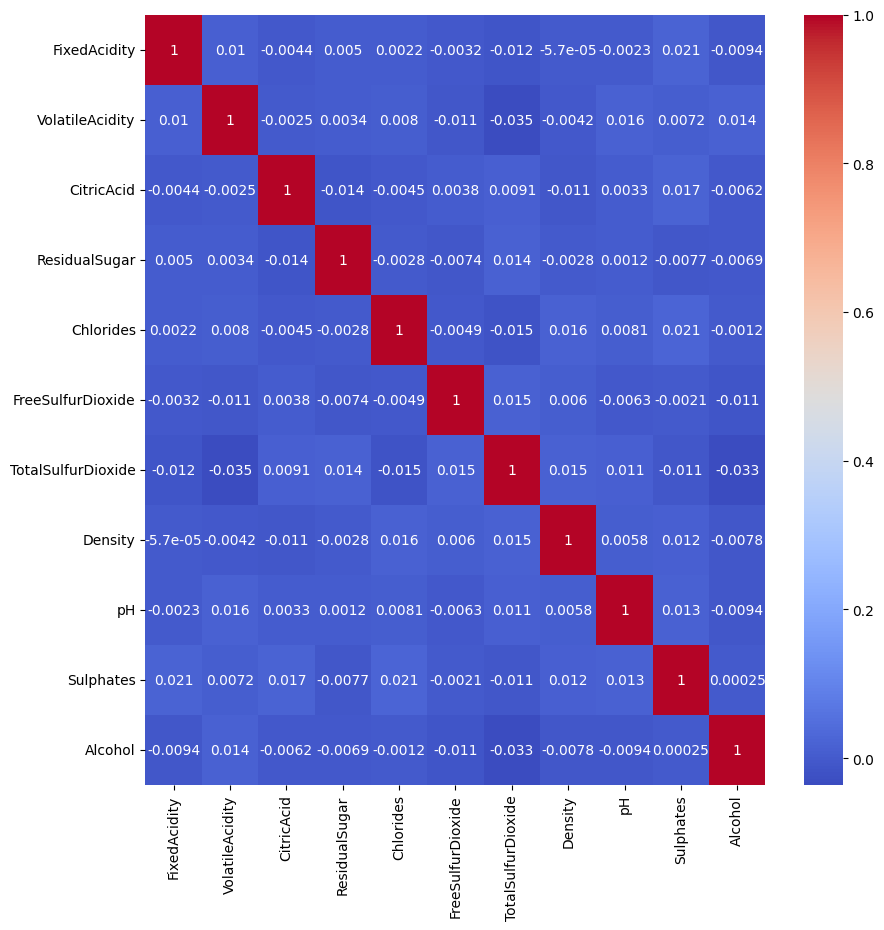

In [25]:
# Visualizing the Correlation of numerical Columns using heatmap - Sainath
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap shows the relationships between various features in the dataset:

- Most of the correlations are very weak, close to 0, indicating minimal linear relationships between the variables.
- The strongest correlations are still relatively weak, suggesting that the features are largely independent of one another.
- This suggests that multicollinearity is not a major concern in this dataset, as most variables do not show strong linear dependencies.


Overall, the dataset seems to have fairly independent features, making it more suitable for models that assume low correlations between variables.

####**Alcohol vs pH with TARGET**

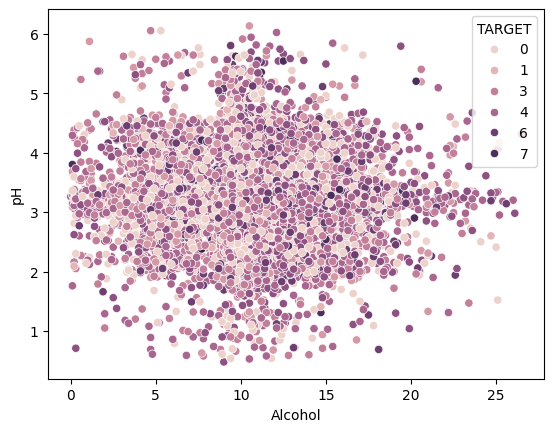

In [26]:
# -Sainath
sns.scatterplot(x='Alcohol',y='pH',data=df,hue='TARGET')
plt.show()

The scatter plot displays the relationship between Alcohol and pH, with the color intensity representing different TARGET values.

- There is no clear linear relationship between Alcohol and pH, as the points are widely and evenly scattered across the plot.
- The TARGET values, represented by different shades, are dispersed throughout the plot, indicating that neither Alcohol nor pH shows a strong influence on the TARGET.

Overall, the lack of a distinct pattern suggests that Alcohol and pH are not strongly related to each other or to the TARGET variable in this dataset.

####**ResidualSugar vs VolatileAcidity with LabelAppeal**

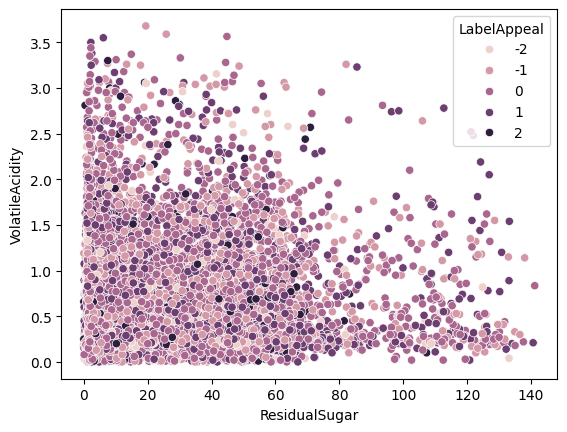

In [27]:
# -Sainath
sns.scatterplot(x='ResidualSugar',y='VolatileAcidity',data=df,hue='LabelAppeal')
plt.show()

The scatter plot illustrates the relationship between ResidualSugar and VolatileAcidity, with points colored according to different LabelAppeal values.

- There is a weak negative trend between ResidualSugar and VolatileAcidity, as VolatileAcidity tends to be higher when ResidualSugar is low, but this relationship is not strong.
- The distribution of LabelAppeal values is fairly uniform across the plot, indicating that different LabelAppeal ratings are spread throughout the range of ResidualSugar and VolatileAcidity values.

Overall, the plot suggests that ResidualSugar and VolatileAcidity do not have a strong relationship with LabelAppeal in this dataset.

####**TotalSulfurDioxide vs FreeSulfurDioxide with STARS**

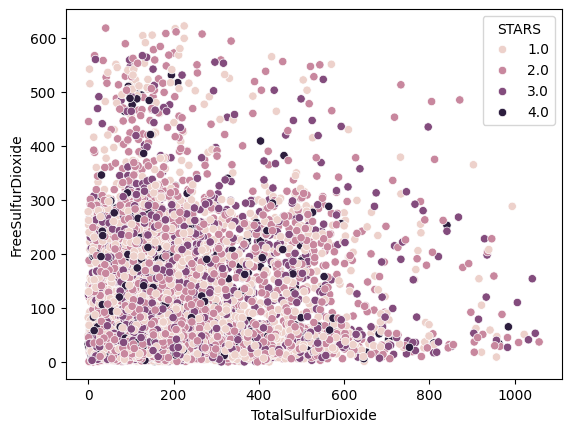

In [28]:
# -Sainath
sns.scatterplot(x='TotalSulfurDioxide',y='FreeSulfurDioxide',data=df,hue='STARS')
plt.show()

The scatter plot displays the relationship between TotalSulfurDioxide and FreeSulfurDioxide, with the color intensity representing different STARS ratings.

- There is a positive correlation between TotalSulfurDioxide and FreeSulfurDioxide, indicating that as the TotalSulfurDioxide level increases, FreeSulfurDioxide tends to increase as well.
- The STARS ratings are distributed fairly evenly across the plot, suggesting that neither TotalSulfurDioxide nor FreeSulfurDioxide shows a strong influence on the STARS ratings.

Overall, the plot confirms the expected relationship between TotalSulfurDioxide and FreeSulfurDioxide, but these variables do not have a distinct impact on STARS ratings in this dataset.

####**FixedAcidity vs Chlorides with AcidIndex**

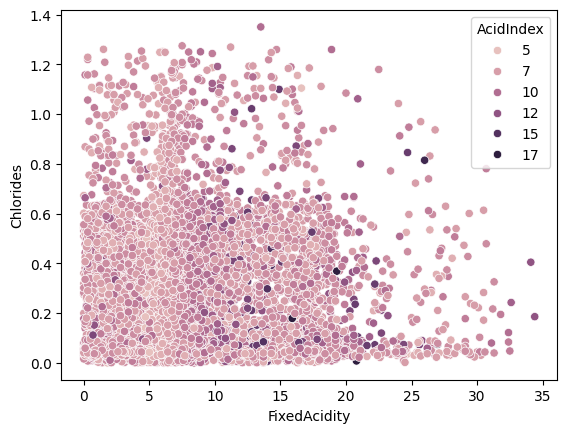

In [29]:
# -Sainath
sns.scatterplot(x='FixedAcidity',y='Chlorides',data=df,hue='AcidIndex')
plt.show()

The scatter plot shows the relationship between FixedAcidity and Chlorides, with point colors representing different AcidIndex values.

- There is a weak positive trend, as Chlorides tend to decrease slightly as FixedAcidity increases, but the relationship is not strong.
- The distribution of AcidIndex values is fairly uniform across the plot, indicating that different levels of AcidIndex occur regardless of the FixedAcidity or Chlorides values.

Overall, FixedAcidity and Chlorides do not exhibit a strong correlation, and the AcidIndex does not show any distinct pattern in this relationship.

####**pH vs Density with TARGET**

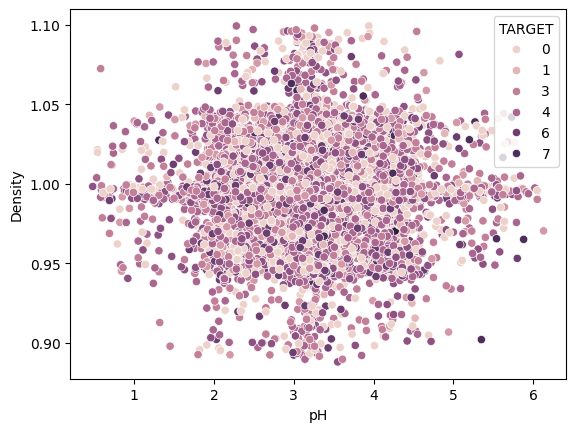

In [30]:
# -Sainath
sns.scatterplot(x='pH',y='Density',data=df,hue='TARGET')
plt.show()

The scatter plot displays the relationship between pH and Density, with point colors representing different TARGET values.

- There is no clear linear relationship between pH and Density, as the data points are widely dispersed across the plot.
- The TARGET values are evenly distributed throughout the plot, suggesting that neither pH nor Density has a strong influence on the TARGET variable.

Overall, the plot indicates that pH and Density do not exhibit a significant correlation, and their relationship does not vary systematically with the TARGET variable.

#**Imputing Columns**

####**KNN**

In [31]:
# Creating a function to impute values using KNN Method - Vedant Sainath, Meher
def KNN_impute_col(col):
  plt.figure(figsize=(10,10))
  print(col)
  #before
  plt.subplot(2,2,1)
  sns.boxplot(df[col])
  plt.title(f'"{col}"before impute')
  plt.subplot(2,2,2)
  sns.histplot(df[col],kde=True)
  plt.title(f'"{col}"before impute')
  #KNN
  df[col] = imputer.fit_transform(df[[col]])
  #after
  plt.subplot(2,2,3)
  sns.boxplot(df[col])
  plt.title(f'"{col}"after impute')
  plt.subplot(2,2,4)
  sns.histplot(df[col], kde=True)
  plt.title(f'"{col}"after impute')
  plt.show()


ResidualSugar


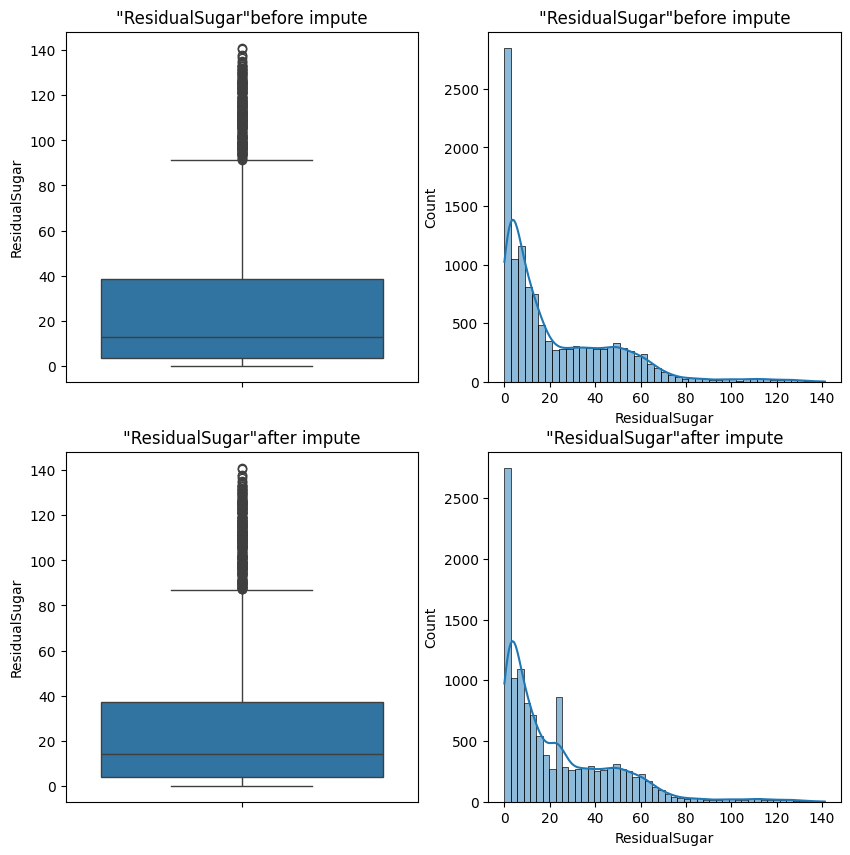

Chlorides


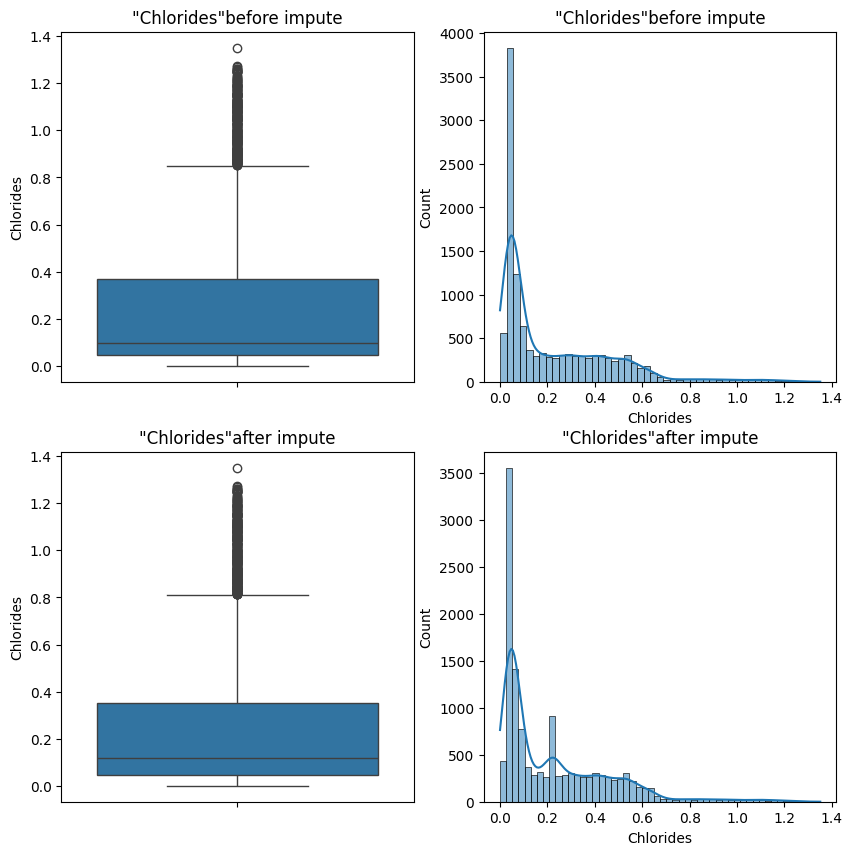

FreeSulfurDioxide


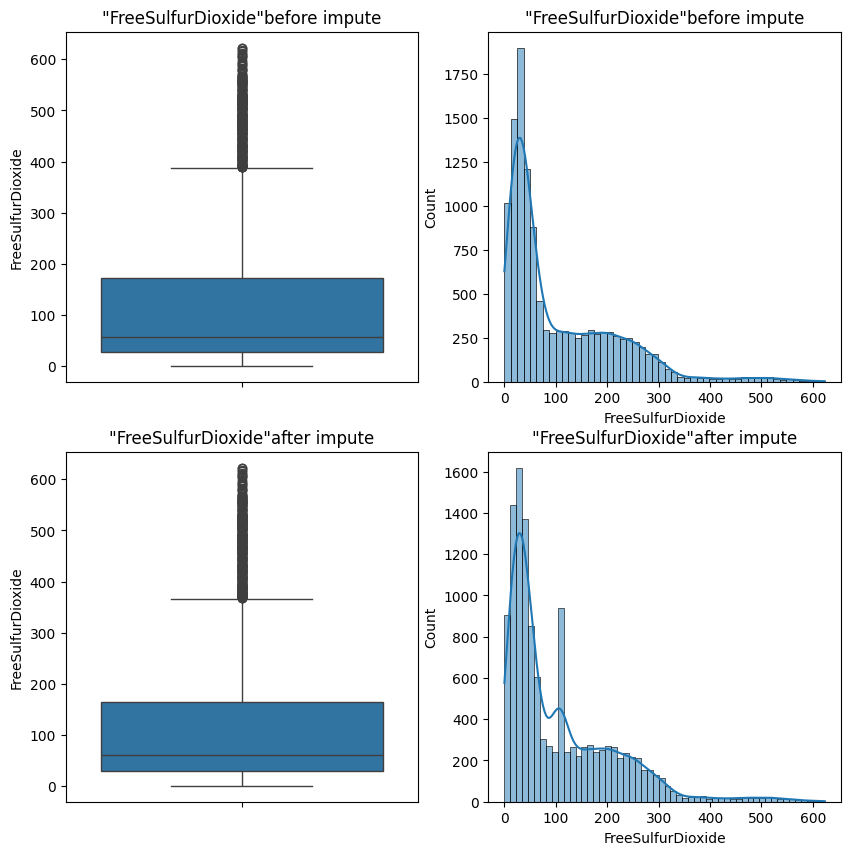

TotalSulfurDioxide


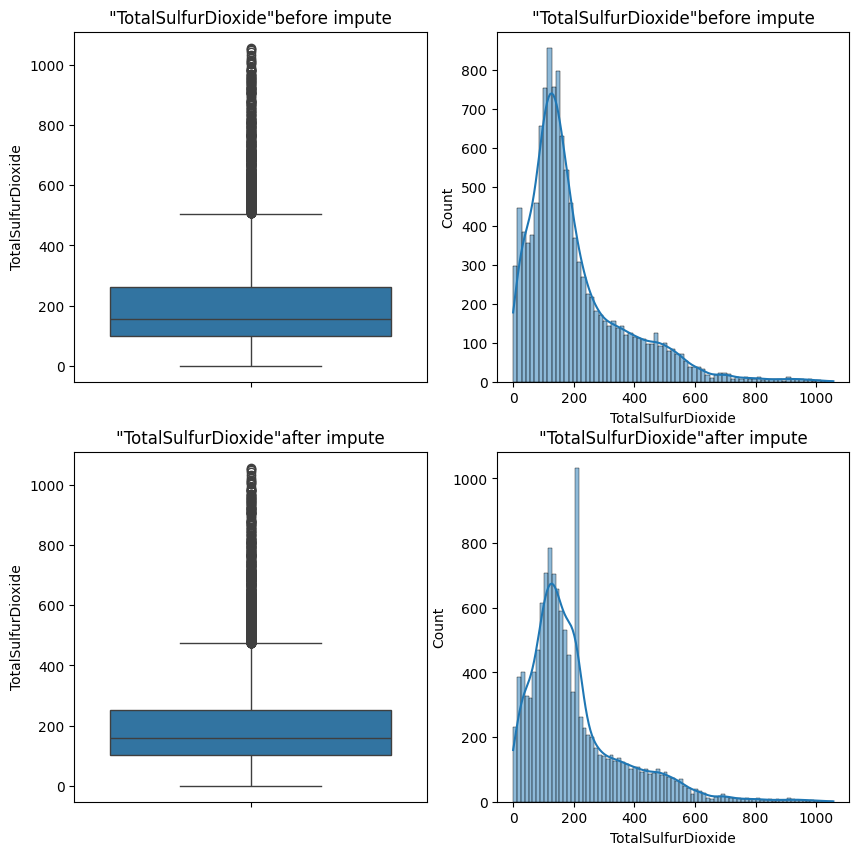

pH


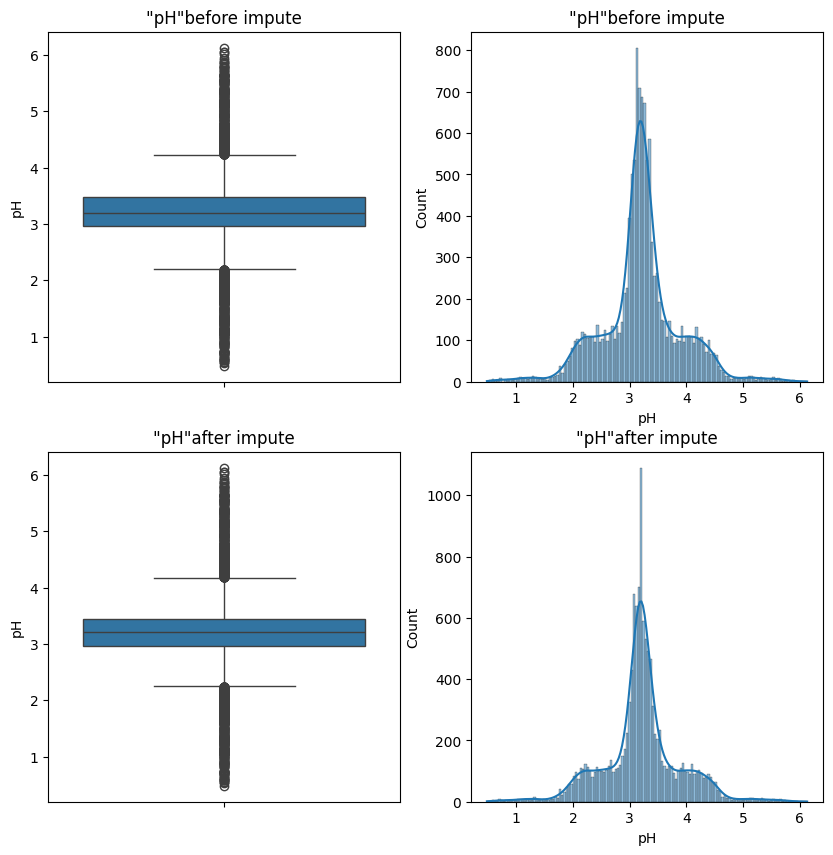

Sulphates


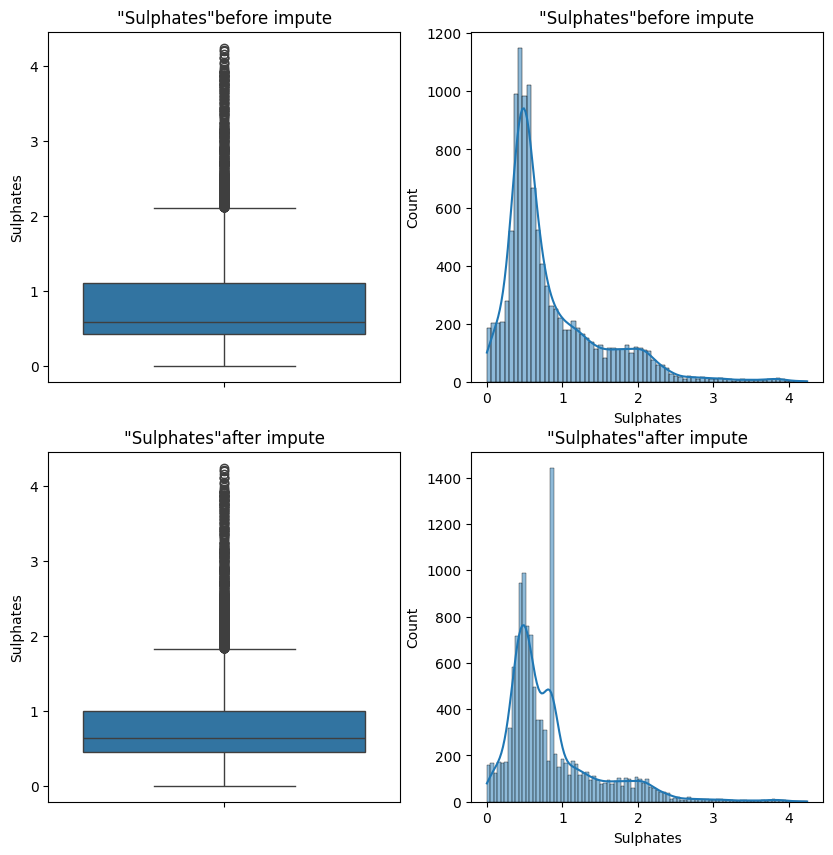

Alcohol


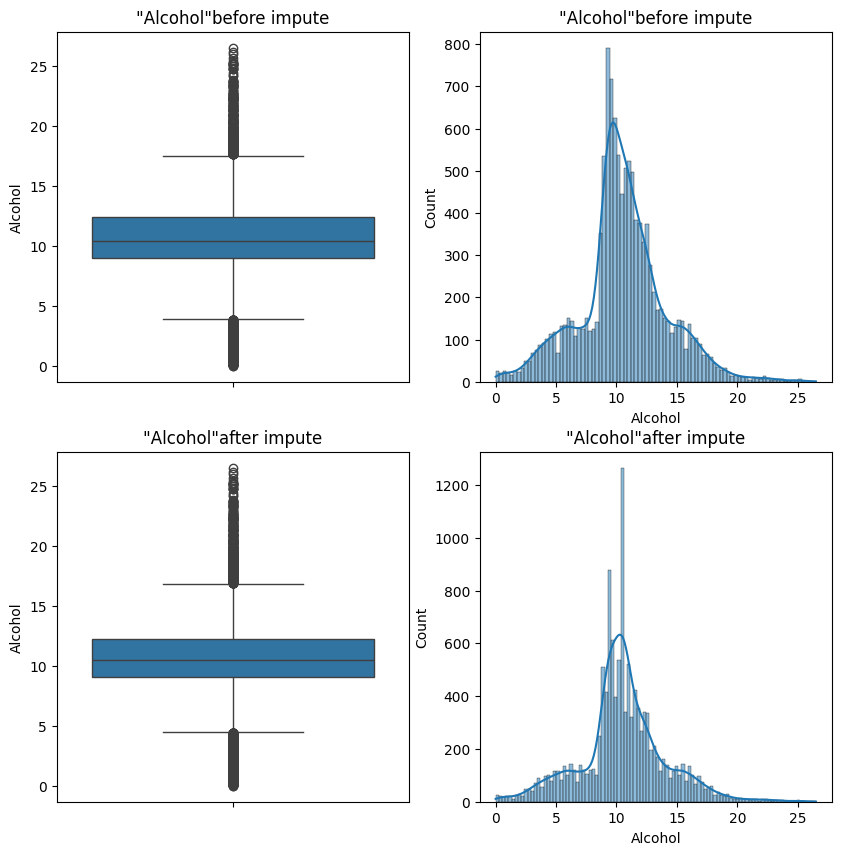

In [32]:
# - Vedant
for col in num_missing_cols:
  KNN_impute_col(col)

 **ResidualSugar**

**Boxplot Analysis:**

- Before imputation, the ResidualSugar distribution shows several outliers, particularly at higher values, with a median around 5.
- After imputation, the boxplot remains nearly identical, indicating that the imputation process did not significantly alter the central tendency or variability of ResidualSugar.

**Histogram Analysis:**

- The histogram before imputation is right-skewed, with most values concentrated between 0 and 20 and a sharp peak at very low levels of ResidualSugar.
- After imputation, the overall shape of the distribution remains the same, with a slight increase in the frequency of the central peak, suggesting that missing values were filled in a way that preserved the original skewness and distribution pattern.

**Chlorides**

**Boxplot Analysis:**

- Before imputation, the Chlorides distribution shows a right-skewed spread with several high-value outliers, while the median is around 0.1.
- After imputation, the boxplot remains largely unchanged, suggesting that the imputation process did not significantly affect the median or the overall variability of Chlorides.

**Histogram Analysis:**

- The histogram before imputation is highly right-skewed, with most values concentrated below 0.2 and a sharp peak at lower levels.
- After imputation, the distribution maintains its original skewness and peak, indicating that missing values were filled in a manner that preserved the original pattern of the data.

 **FreeSulfurDioxide**

**Boxplot Analysis:**

- Before imputation, FreeSulfurDioxide exhibits a right-skewed distribution with numerous high-value outliers, while the median is around 20-40.
- After imputation, the boxplot remains almost identical, indicating that the imputation process did not significantly alter the central tendency or range of FreeSulfurDioxide.

**Histogram Analysis:**

- The histogram before imputation is heavily right-skewed, with a peak at low values (around 0 to 50) and a gradual decline toward higher values.
- After imputation, the shape of the histogram remains consistent, preserving the original skewness and overall distribution pattern.

**TotalSulfurDioxide**

**Boxplot Analysis:**

- Before imputation, TotalSulfurDioxide shows a right-skewed distribution with numerous high-value outliers, while the median is around 100-150.
- After imputation, the boxplot remains almost the same, indicating that the imputation process did not significantly change the central tendency or range of TotalSulfurDioxide.

**Histogram Analysis:**

- The histogram before imputation is heavily right-skewed, with most values concentrated below 200 and a gradual decline toward higher values.
- After imputation, the histogram's shape and skewness remain consistent, with only slight adjustments around the peak, suggesting that the imputation maintained the overall distribution pattern.

**pH**

**Boxplot Analysis:**

- Before imputation, the pH distribution appears relatively symmetric, with some outliers at both the low and high ends. The median is around 3.
- After imputation, the boxplot remains unchanged, indicating that the imputation process did not alter the median, spread, or presence of outliers in the pH values.

**Histogram Analysis:**

- The histogram before imputation shows a roughly normal distribution with a sharp peak around a pH value of 3.
- After imputation, the histogram retains its original shape and peak, suggesting that the imputation preserved the central tendency and distribution pattern of the pH data.

**Sulphates**

**Boxplot Analysis:**

- Before imputation, Sulphates shows a right-skewed distribution with several high-value outliers, while the median is around 0.5-0.6.
- After imputation, the boxplot remains largely unchanged, indicating that the imputation process did not significantly affect the median or range of Sulphates.

**Histogram Analysis:**

- The histogram before imputation shows a heavily right-skewed distribution, with a peak at lower values (around 0.5) and gradually decreasing frequencies toward higher values.
- After imputation, the histogram retains its original skewness and shape, with a slight increase in the count around the central peak, suggesting that missing values were filled in a manner that preserved the overall distribution

**Alcohol**

**Boxplot Analysis**:

- Before imputation, the Alcohol distribution shows several outliers at both the high and low ends, with a median around 10.
- After imputation, the overall structure of the boxplot remains similar, indicating that the imputation process did not significantly alter the central tendency or variability of the Alcohol data.


**Histogram Analysis**:

- The histogram before imputation shows a peak around 10, with a slight dip in frequencies at other values.
- After imputation, the distribution is smoother around the peak, with an increase in counts at the central value, suggesting that missing values were filled in a way that maintained the overall shape of the distribution.

####**STARS**

In [33]:
# - Sainath
df.STARS.value_counts()

,count
STARS,
2.0,3570
1.0,3042
3.0,2212
4.0,612


In [34]:
# - Sainath
df.STARS.isnull().sum()

3359

In [35]:
# - Sainath
df.STARS.describe()

,STARS
count,9436.000000
mean,2.041755
std,0.902540
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


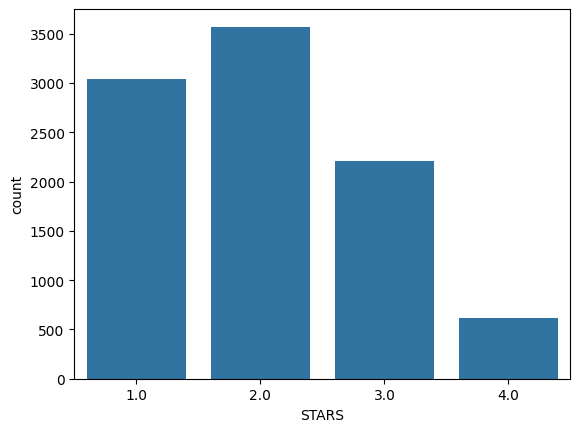

In [36]:
# Before imputation  - Sainath
sns.countplot(x=df.STARS, data=df)
plt.show()

In [37]:
# Imputing missing values in Stars based on Target Variable as it is correlated highly with it - Sainath
df['STARS'] = df.groupby('TARGET')['STARS'].transform(lambda x: x.fillna(x.median()))
df.STARS

,STARS
0,2.0
1,3.0
2,3.0
3,1.0
4,2.0
...,...
12790,1.0
12791,2.0
12792,2.0
12793,2.0


In [38]:
# Checking Null Values - Sainath
df.STARS.isnull().sum()

0

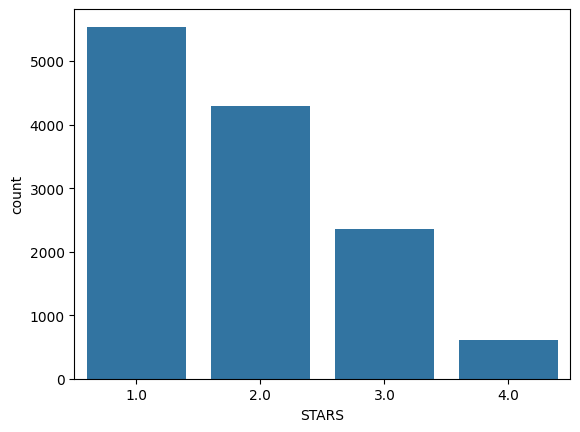

In [39]:
# After Imputing - Sainath
sns.countplot(x=df.STARS, data=df)
plt.show()

In [40]:
# - Sainath
df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,1.846815
std,1.926368,4.996119,0.555614,0.606005,24.337722,0.228371,105.333826,158.709771,0.026538,0.669113,0.623840,3.535326,0.891089,1.323926,0.886287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,4.000000,0.046000,29.000000,102.000000,0.987720,2.970000,0.450000,9.100000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,14.200000,0.120000,61.000000,160.000000,0.994490,3.207628,0.640000,10.500000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,37.200000,0.353000,164.000000,251.000000,1.000515,3.450000,1.000000,12.200000,1.000000,8.000000,2.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


#**Conclusion**

In this project, a detailed exploratory data analysis (EDA) revealed several data integrity and usability issues, such as missing values, outliers, and skewed distributions. These issues were addressed through various data preparation techniques, including imputation, transformations, and scaling, improving the dataset's quality and suitability for machine learning. The re-evaluation of the prepped data showed significant improvements in the overall data structure and distribution, making it more reliable for further analysis or model development. This preparation has established a strong foundation for using the data in predictive modeling, ensuring that the features are well-behaved and free of inconsistencies that could negatively affect model performance.